In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
%matplotlib inline
import pandas as pd
from graspy.plot import pairplot

In [6]:
data_dir = Path('/mnt/c/Users/Ronan Perry/Documents/JHU/jovo-lab/multiview/data')
embed_dir = data_dir / 'embedding'

In [7]:
!ls '/mnt/c/Users/Ronan Perry/Documents/JHU/jovo-lab/multiview/data/embedding'

'fmri_gcca-n=10_315-10_52.csv'
'fmri_gcca-n=10_315-11_21.csv'
'fmri_gcca-n=852_T=319-11_24.csv'
 fmri_gcca_315-10_51.csv
'fmri_gcca_projection_mat_T=319-11_24.csv'
'gcca_projection_matrices_T=319-11_24.csv'
'goa_gcca-n=10_315-10_52.csv'
'goa_gcca-n=10_315-11_21.csv'
'goa_gcca-n=852_T=319-11_24.csv'
 goa_gcca_315-10_51.csv
'goa_gcca_projection_mat_T=319-11_24.csv'
'sc_gcca-n=10_315-10_52.csv'
'sc_gcca-n=10_315-11_21.csv'
'sc_gcca-n=852_T=319-11_24.csv'
 sc_gcca_315-10_51.csv
'sc_gcca_projection_mat_T=319-11_24.csv'


In [8]:
timestamp = 'n=852_T=319-11_24'
files = [f'fmri_gcca-{timestamp}.csv', f'sc_gcca-{timestamp}.csv', f'goa_gcca-{timestamp}.csv']

In [11]:
Xs = [np.genfromtxt(embed_dir / file, delimiter=' ') for file in files]

In [20]:
timestamp = 'T=319-11_24'
proj_mat_files = [f'fmri_gcca_projection_mat_{timestamp}.csv', f'sc_gcca_projection_mat_{timestamp}.csv', f'goa_gcca_projection_mat_{timestamp}.csv']

In [21]:
proj_mats = [np.genfromtxt(embed_dir / file, delimiter=',') for file in proj_mat_files]

In [11]:
fmri_projs = np.genfromtxt(embed_dir / files[0], delimiter=',')
sc_projs = np.genfromtxt(embed_dir / files[1], delimiter=',')
clinical_projs = np.genfromtxt(embed_dir / files[2], delimiter=',')

In [24]:
demographics = pd.read_csv(data_dir / 'raw' / 'Demographics_MedicalFilter.csv')
bblids = np.genfromtxt(data_dir / 'filtered_matched_bblids.csv').astype(int)

In [26]:
## Sex
sexes = [demographics.query(f'bblid == {bblid}')['sex'].iloc[0] for bblid in bblids]
## Age
ages = [demographics.query(f'bblid == {bblid}')['ageAtCnb1'].iloc[0] for bblid in bblids]

[]

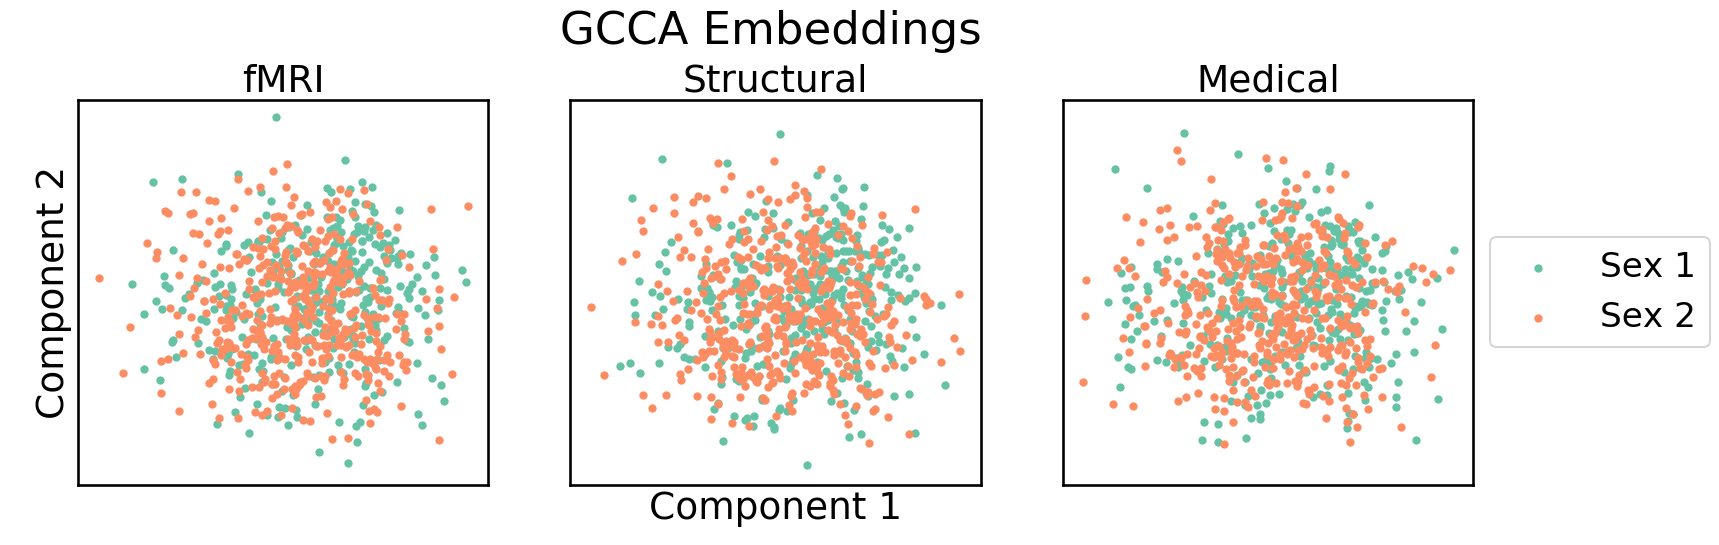

In [175]:
# plt.style.use('seaborn')
sns.set_context("talk", font_scale=1.5)

y = sexes
classes = np.unique(y)

color_map = sns.color_palette("Set2", len(classes))

fig, axes = plt.subplots(1,3,figsize=(18,5), sharey=True)

names = ['fMRI', 'Structural', 'Medical']

for i, (X, ax) in enumerate(zip([fmri_projs, sc_projs, clinical_projs], axes.flatten())):
    for cls in classes:
        ax.scatter(x=X[np.where(y == cls),0], 
                    y=X[np.where(y == cls),1], 
                    alpha=1, label=f'Sex {cls}', color=color_map[int(cls-1)], s=20)
    #ax.scatter(x=X[:,0], y=X[:,1], alpha=1, label=y, color=color_map, s=25)
    ax.set_title(f'{names[i]}')
    ax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    
ax = fig.add_subplot(111, frameon=False)

fig.suptitle('GCCA Embeddings',y=1.06,x=0.51)

#ax.grid(False)
box = ax.get_position()
# Put a legend to the right of the current axis
axes[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')

ax.set_xticks([], [])
ax.set_yticks([], [])

Text(0, 0.5, 'Component 2')

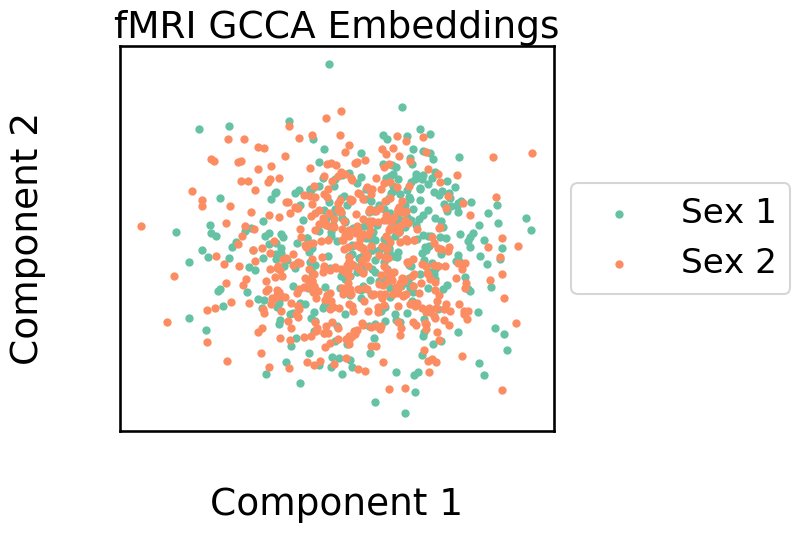

In [124]:
plt.style.use('default')
sns.set_context("talk", font_scale=1.5)

y = sexes

color_map = sns.color_palette("Set2", len(np.unique(y)))

fig, ax = plt.subplots(figsize=(7,5))

for cls in np.unique(y):
    ax.scatter(x=fmri_projs[np.where(y == cls),0], 
                y=fmri_projs[np.where(y == cls),1], 
                alpha=1, label=f'Sex {cls}', color=color_map[int(cls-1)], s=20)
plt.title(f'fMRI GCCA Embeddings')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
ax.grid(False)
plt.xlabel('Component 1')
plt.ylabel('Component 2')

In [195]:
age_ranges = np.digitize(ages, np.arange(8,22+1,2)*12)
age_range_text = [f'Ages {6+2*i}-{8+2*i}' for i in age_ranges]
classes = [f'Ages {6+2*i}-{8+2*i}' for i in range(1,8)]

[]

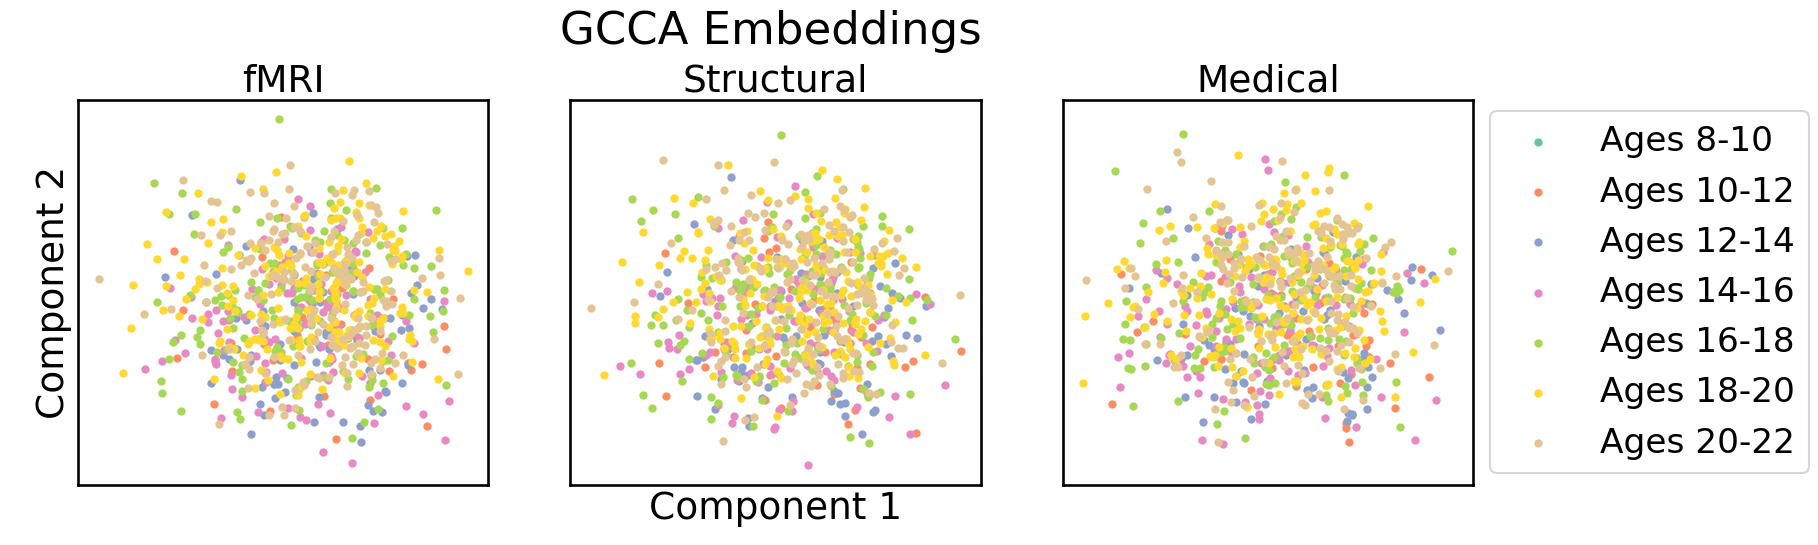

In [203]:
# plt.style.use('seaborn')
sns.set_context("talk", font_scale=1.5)

y = age_range_text

color_map = sns.color_palette("Set2", len(classes))

fig, axes = plt.subplots(1,3,figsize=(18,5), sharey=True)

names = ['fMRI', 'Structural', 'Medical']

for i, (X, ax) in enumerate(zip([fmri_projs, sc_projs, clinical_projs], axes.flatten())):
    for j,cls in enumerate(classes):
        ax.scatter(x=X[np.where(age_ranges == j),0], 
                   y=X[np.where(age_ranges == j),1], 
                   alpha=1, label=cls, color=color_map[j], s=20)
    ax.set_title(f'{names[i]}')
    ax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    
ax = fig.add_subplot(111, frameon=False)

fig.suptitle('GCCA Embeddings',y=1.06,x=0.51)

#ax.grid(False)
box = ax.get_position()
# Put a legend to the right of the current axis
axes[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')

ax.set_xticks([], [])
ax.set_yticks([], [])